In [1]:
import skimage.io as io 
from skimage.transform import resize 
from skimage import data
import pylab as plt
import numpy as np
from numpy import loadtxt
train_labels = loadtxt('train_preprocessed/labels.txt', comments="#", delimiter=",", unpack=False)
valid_labels = loadtxt('valid_preprocessed/labels.txt', comments="#", delimiter=",", unpack=False)
###################################################
# data pre processing step
#for i in range(1829):
#    if (i%100 == 0):
#        print i 
#    filename = 'valid/'+  str(i) + '.png'
#    im = io.imread(filename)
#    im2 = resize(im, (28, 28),mode='nearest')
#    plt.imsave('valid_prepreprocessed/' + str(i) + '.png', im2, cmap = plt.cm.gray)
###################################################

In [3]:
#data acquisition for the project
from skimage import io 
import os
import numpy
from scipy import misc
#############################################
train_data = np.zeros((17205,28*28))
for i in range(17205):
    if (i%100 == 0):
        print i 
    filename = 'train_prepreprocessed/'+  str(i) + '.png'
    im = io.imread(filename,dtype=np.float32)
    im2 = np.reshape(im[:,:,0],-1)
    train_data[i] = im2
valid_data = np.zeros((1829,28*28))
for i in range(1829):
    if (i%100 == 0):
        print i 
    filename = 'valid_prepreprocessed/'+  str(i) + '.png'
    im = io.imread(filename,dtype=np.float32)
    im2 = np.reshape(im[:,:,0],-1)
    valid_data[i] = im2
#############################################

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1

import tensorflow as tf
import numpy as np
#####################################
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, 100*100])
y_ = tf.placeholder(tf.float32, shape=[None, 104])
W = tf.Variable(tf.zeros([100*100,104]))
b = tf.Variable(tf.zeros([104]))
sess.run(tf.initialize_all_variables())
y = tf.nn.softmax(tf.matmul(x,W) + b)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
batchsize = 50
for i in range(1000):
    rand_array = np.random.randint(17205, size=batchsize)
    train_step.run(feed_dict={x: train_data[rand_array], y_: train_labels[rand_array]})
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

In [3]:
print np.dtype(train_data)

TypeError: data type not understood

In [ ]:
#Single layer network (Not a deep network) (accuracy = 0.9%)
'''
import tensorflow as tf
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, 100*100])
y_ = tf.placeholder(tf.float32, shape=[None, 104])
W = tf.Variable(tf.zeros([100*100,104]))
b = tf.Variable(tf.zeros([104]))
sess.run(tf.initialize_all_variables())
y = tf.nn.softmax(tf.matmul(x,W) + b)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)
batch_size = 50
for i in range(100):
    print i
    batch = {}
    randdata = np.random.randint(17205, size=batch_size)
    batch[0] =train_data[randdata]
    v = np.zeros((batch_size,104))
    C = np.vstack((range(batch_size),train_labels[randdata].astype(int)))
    v[C[0],C[1]] = 1
    batch[1] = v
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
v = np.zeros((1829,104))
C = np.vstack((range(1829),valid_labels.astype(int)))
v[C[0],C[1]] = 1
print(accuracy.eval(feed_dict={x: valid_data, y_: v}))
'''


In [71]:

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import tensorflow as tf
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
sess.run(tf.initialize_all_variables())
y = tf.nn.softmax(tf.matmul(x,W) + b)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
for i in range(1000):
  batch = mnist.train.next_batch(50)
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})
    


"\nfrom tensorflow.examples.tutorials.mnist import input_data\nmnist = input_data.read_data_sets('MNIST_data', one_hot=True)\nimport tensorflow as tf\nsess = tf.InteractiveSession()\nx = tf.placeholder(tf.float32, shape=[None, 784])\ny_ = tf.placeholder(tf.float32, shape=[None, 10])\nW = tf.Variable(tf.zeros([784,10]))\nb = tf.Variable(tf.zeros([10]))\nsess.run(tf.initialize_all_variables())\ny = tf.nn.softmax(tf.matmul(x,W) + b)\ncross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))\ntrain_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)\nfor i in range(1000):\n  batch = mnist.train.next_batch(50)\n  train_step.run(feed_dict={x: batch[0], y_: batch[1]})\n"

In [42]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))


def model(X, w_h, w_o):
    h = tf.nn.sigmoid(tf.matmul(X, w_h)) # this is a basic mlp, think 2 stacked logistic regressions
    return tf.matmul(h, w_o) # note that we dont take the softmax at the end because our cost fn does that for us

trY = np.zeros((17205,104),dtype=float)
C = np.vstack((range(17205),train_labels.astype(int)))
trY[C[0],C[1]] = 1.
teY = np.zeros((1829,104),dtype=float)
C = np.vstack((range(1829),valid_labels.astype(int)))
teY[C[0],C[1]] = 1.
trX = train_data/255.0 
teX = valid_data/255.0

X = tf.placeholder(tf.float32, [None, 100*100])
Y = tf.placeholder(tf.float32, [None, 104])

w_h = init_weights([100*100, 625]) # create symbolic variables
w_o = init_weights([625, 104])

py_x = model(X, w_h, w_o)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(py_x, Y)) # compute costs
train_op = tf.train.AdamOptimizer(1e-4).minimize(cost) # construct an optimizer
predict_op = tf.argmax(py_x, 1)
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cost)
# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize all variables
    sess.run(tf.initialize_all_variables())

    for i in range(100):
        print sess.run(w_h)
        for start, end in zip(range(0, len(trX), 128), range(128, len(trX)+1, 128)):
            #sess.run(train_step, feed_dict={X: trX[start:end], Y: trY[start:end]})
            sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end]})
        print(i, np.mean(np.argmax(teY, axis=1) ==
                         sess.run(predict_op, feed_dict={X: teX, Y: teY})))

[[ 0.01601581  0.00128071  0.00633404 ...,  0.02167102 -0.01106172
  -0.00522846]
 [-0.00571481 -0.00117412 -0.00489688 ...,  0.00730904  0.00437613
  -0.0123349 ]
 [ 0.01045414 -0.0043027  -0.00075398 ..., -0.01257539 -0.00610142
   0.00958131]
 ..., 
 [ 0.00506356 -0.01832821  0.01065328 ...,  0.00938779  0.0135701
   0.0008189 ]
 [ 0.00098461  0.00245758  0.01965292 ..., -0.01354978  0.00798335
   0.0140233 ]
 [-0.00536439 -0.00231754  0.00148956 ...,  0.00240647 -0.00865967
   0.00276663]]
(0, 0.010934937124111536)
[[ 0.01595072  0.00123778  0.00618966 ...,  0.02106764 -0.01066751
  -0.00590756]
 [-0.00577991 -0.00121704 -0.00504127 ...,  0.00670565  0.00477034
  -0.01301399]
 [ 0.01038904 -0.00434562 -0.00089837 ..., -0.01317879 -0.00570721
   0.00890222]
 ..., 
 [ 0.00499846 -0.01837113  0.01050889 ...,  0.00878439  0.01396431
   0.00013981]
 [ 0.00091951  0.00241465  0.01950853 ..., -0.01415318  0.00837756
   0.01334421]
 [-0.00542949 -0.00236047  0.00134517 ...,  0.00180307 -0.

KeyboardInterrupt: 

In [35]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))


def model(X, w_h, w_o,w_h2):
    h = tf.nn.relu(tf.matmul(X, w_h)) # this is a basic mlp, think 2 stacked logistic regressions
    h_2=tf.nn.relu(tf.matmul(h, w_h2))
    return tf.matmul(h_2, w_o) # note that we dont take the softmax at the end because our cost fn does that for us

trX = train_images/255.0
trY = test_images/255.0
trY = train_labels
reY = test_labels

X = tf.placeholder("float", [None, 100*100])
Y = tf.placeholder("float", [None, 104])

w_h = init_weights([100*100, 625]) # create symbolic variables
w_h2 = init_weights([625, 625])
w_o = init_weights([625, 104])

py_x = model(X, w_h, w_o,w_h2)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(py_x, Y)) # compute costs
train_op = tf.train.AdamOptimizer(1e-1).minimize(cost) # construct an optimizer
predict_op = tf.argmax(py_x, 1)
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cost)
# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize all variables
    sess.run(tf.initialize_all_variables())

    for i in range(100):
        for start, end in zip(range(0, len(trX), 200), range(200, len(trX)+1, 200)):
            sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end]})
        print(i, np.mean(np.argmax(teY, axis=1) ==
                         sess.run(predict_op, feed_dict={X: teX, Y: teY})))

ValueError: Cannot feed value of shape (200, 784) for Tensor u'Placeholder_16:0', which has shape '(?, 10000)'

In [11]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

batch_size = 128
test_size = 256

def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))


def model(X, w, w2, w3, w4, w_o,p_keep_conv, p_keep_hidden):
    l1a = tf.nn.relu(tf.nn.conv2d(X, w,                       # l1a shape=(?, 28, 28, 32)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l1 = tf.nn.max_pool(l1a, ksize=[1, 2, 2, 1],              # l1 shape=(?, 14, 14, 32)
                        strides=[1, 2, 2, 1], padding='SAME')
    l1 = tf.nn.dropout(l1, p_keep_conv)

    l2a = tf.nn.relu(tf.nn.conv2d(l1, w2,                     # l2a shape=(?, 14, 14, 64)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l2 = tf.nn.max_pool(l2a, ksize=[1, 2, 2, 1],              # l2 shape=(?, 7, 7, 64)
                        strides=[1, 2, 2, 1], padding='SAME')
    l2 = tf.nn.dropout(l2, p_keep_conv)

    l3a = tf.nn.relu(tf.nn.conv2d(l2, w3,                     # l3a shape=(?, 7, 7, 128)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l3 = tf.nn.max_pool(l3a, ksize=[1, 2, 2, 1],              # l3 shape=(?, 4, 4, 128)
                        strides=[1, 2, 2, 1], padding='SAME')
    l3 = tf.reshape(l3, [-1, w4.get_shape().as_list()[0]])    # reshape to (?, 2048)
    l3 = tf.nn.dropout(l3, p_keep_conv)

    l4 = tf.nn.relu(tf.matmul(l3, w4))
    l4 = tf.nn.dropout(l4, p_keep_hidden)

    pyx = tf.matmul(l4, w_o)
    return pyx

#X = tf.placeholder("float", [None, 28, 28, 1])
#Y = tf.placeholder("float", [None, 104])
w = init_weights([3, 3, 1, 32])       # 3x3x1 conv, 32 outputs
#w2 = init_weights([3, 3, 32, 64])     # 3x3x32 conv, 64 outputs
#w3 = init_weights([3, 3, 64, 128])    # 3x3x32 conv, 128 outputs
#w4 = init_weights([128 * 4 * 4, 625]) # FC 128 * 4 * 4 inputs, 625 outputs
#w_o = init_weights([625, 104])   # FC 625 inputs, 10 outputs (labels)
#w_o1 = init_weights([625, 104])
#p_keep_conv = tf.placeholder("float")
#p_keep_hidden = tf.placeholder("float")
#py_x = model(X, w, w2, w3, w4, w_o,p_keep_conv, p_keep_hidden)
saver = tf.train.Saver()
sess = tf.Session()
#sess.run(tf.initialize_all_variables())
#save_path = saver.save(sess, "model.ckpt")
#print("Model saved in file: %s" % save_path)
#saver.restore(sess, "model/model.ckpt")
#print("Model restored.")
saver.restore(sess, "model.ckpt")
print("Model restored.")


Model saved in file: model.ckpt


In [35]:
np.savetxt('train_0.0001_accuracy.txt', train_accuracy)
np.savetxt('test_0.0001_accuracy.txt', test_accuracy)
print train_accuracy

[ 0.015625    0.27734375  0.39453125  0.52734375  0.6015625   0.65625
  0.61328125  0.71875     0.69921875  0.765625    0.7890625   0.79296875
  0.76953125  0.83203125  0.8125      0.82421875  0.83984375  0.84375
  0.87109375  0.88671875]


In [37]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

batch_size = 128
test_size = 256

def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))


def model(X, w, w2, w3, w4, w_o,p_keep_conv, p_keep_hidden):
    l1a = tf.nn.relu(tf.nn.conv2d(X, w,                       # l1a shape=(?, 28, 28, 32)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l1 = tf.nn.max_pool(l1a, ksize=[1, 2, 2, 1],              # l1 shape=(?, 14, 14, 32)
                        strides=[1, 2, 2, 1], padding='SAME')
    l1 = tf.nn.dropout(l1, p_keep_conv)

    l2a = tf.nn.relu(tf.nn.conv2d(l1, w2,                     # l2a shape=(?, 14, 14, 64)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l2 = tf.nn.max_pool(l2a, ksize=[1, 2, 2, 1],              # l2 shape=(?, 7, 7, 64)
                        strides=[1, 2, 2, 1], padding='SAME')
    l2 = tf.nn.dropout(l2, p_keep_conv)

    l3a = tf.nn.relu(tf.nn.conv2d(l2, w3,                     # l3a shape=(?, 7, 7, 128)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l3 = tf.nn.max_pool(l3a, ksize=[1, 2, 2, 1],              # l3 shape=(?, 4, 4, 128)
                        strides=[1, 2, 2, 1], padding='SAME')
    l3 = tf.reshape(l3, [-1, w4.get_shape().as_list()[0]])    # reshape to (?, 2048)
    l3 = tf.nn.dropout(l3, p_keep_conv)

    l4 = tf.nn.relu(tf.matmul(l3, w4))
    l4 = tf.nn.dropout(l4, p_keep_hidden)

    pyx = tf.matmul(l4, w_o)
    return pyx

#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
#trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
#trY = np.zeros((17205,104),dtype=float)
#C = np.vstack((range(17205),train_labels.astype(int)))
#trY[C[0],C[1]] = 1.
#teY = np.zeros((1829,104),dtype=float)
#C = np.vstack((range(1829),valid_labels.astype(int)))
#teY[C[0],C[1]] = 1.
trY = train_labels
teY = test_labels
trX = train_images 
teX = test_images
trX = trX.reshape(-1, 28, 28, 1)  # 28x28x1 input img
teX = teX.reshape(-1, 28, 28, 1)  # 28x28x1 input img

X = tf.placeholder("float", [None, 28, 28, 1])
Y = tf.placeholder("float", [None, 104])

w = init_weights([3, 3, 1, 32])       # 3x3x1 conv, 32 outputs
w2 = init_weights([3, 3, 32, 64])     # 3x3x32 conv, 64 outputs
w3 = init_weights([3, 3, 64, 128])    # 3x3x32 conv, 128 outputs
w4 = init_weights([128 * 4 * 4, 625]) # FC 128 * 4 * 4 inputs, 625 outputs
w_o = init_weights([625, 104])   # FC 625 inputs, 10 outputs (labels)
#w_o1 = init_weights([625, 104])

p_keep_conv = tf.placeholder("float")
p_keep_hidden = tf.placeholder("float")
#reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
#reg_constant = 0.01  # Choose an appropriate one.
py_x = model(X, w, w2, w3, w4, w_o,p_keep_conv, p_keep_hidden)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(py_x, Y))
train_op = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)
predict_op = tf.argmax(py_x, 1)
saver = tf.train.Saver()
# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize all variables
    tf.initialize_all_variables().run()
    train_accuracy = np.zeros(30)
    test_accuracy  = np.zeros(30)
    saver.restore(sess, "model/model.ckpt")
    print("Model restored.")
    for i in range(30):
        training_batch = zip(range(0, len(trX), batch_size),
                             range(batch_size, len(trX)+1, batch_size))
        for start, end in training_batch:
            sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end],
                                          p_keep_conv: 0.8, p_keep_hidden: 0.5})
        train_indices = np.arange(len(trX)) 
        test_indices = np.arange(len(teX)) # Get A Test Batch
        np.random.shuffle(test_indices)
        np.random.shuffle(train_indices)
        train_indices =train_indices[0:test_size]  
        test_indices = test_indices[0:test_size]
        test_accuracy[i] = np.mean(np.argmax(teY[test_indices], axis=1) ==
                         sess.run(predict_op, feed_dict={X: teX[test_indices],
                                                         Y: teY[test_indices],
                                                         p_keep_conv: 1.0,
                                                         p_keep_hidden: 1.0}))
        train_accuracy[i] = np.mean(np.argmax(trY[train_indices], axis=1) ==
                         sess.run(predict_op, feed_dict={X: trX[train_indices],
                                                         Y: trY[train_indices],
                                                         p_keep_conv: 1.0,
                                                         p_keep_hidden: 1.0}))
        print(i, np.mean(np.argmax(teY[test_indices], axis=1) ==
                         sess.run(predict_op, feed_dict={X: teX[test_indices],
                                                         Y: teY[test_indices],
                                                         p_keep_conv: 1.0,
                                                         p_keep_hidden: 1.0})))


NotFoundError: Tensor name "Variable_90" not found in checkpoint files model/model.ckpt
	 [[Node: save_8/restore_slice_210 = RestoreSlice[dt=DT_FLOAT, preferred_shard=-1, _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_8/Const_0, save_8/restore_slice_210/tensor_name, save_8/restore_slice_210/shape_and_slice)]]

Caused by op u'save_8/restore_slice_210', defined at:
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-1b67d8f44fdc>", line 72, in <module>
    saver = tf.train.Saver()
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 986, in __init__
    self.build()
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 1015, in build
    restore_sequentially=self._restore_sequentially)
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 620, in build
    restore_sequentially, reshape)
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 357, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/training/saver.py", line 270, in restore_op
    preferred_shard=preferred_shard))
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/ops/io_ops.py", line 204, in _restore_slice
    preferred_shard, name=name)
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/ops/gen_io_ops.py", line 359, in _restore_slice
    preferred_shard=preferred_shard, name=name)
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 749, in apply_op
    op_def=op_def)
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2380, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/pulkit/anaconda2/envs/tensorflow/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1298, in __init__
    self._traceback = _extract_stack()

NotFoundError (see above for traceback): Tensor name "Variable_90" not found in checkpoint files model/model.ckpt
	 [[Node: save_8/restore_slice_210 = RestoreSlice[dt=DT_FLOAT, preferred_shard=-1, _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_8/Const_0, save_8/restore_slice_210/tensor_name, save_8/restore_slice_210/shape_and_slice)]]


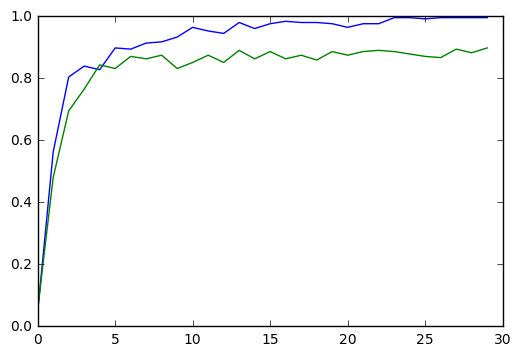

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(range(30),train_accuracy)
plt.plot(range(30),test_accuracy)
plt.show()

In [11]:
print train_accuracy-test_accuracy

[ 0.078125    0.6484375   0.86328125  0.88671875  0.88671875  0.90625
  0.9453125   0.9453125   0.94921875  0.9609375   0.95703125  0.953125
  0.97265625  0.984375    0.984375    0.98828125  0.97265625  0.97265625
  0.984375    0.97265625  0.9765625   0.98828125  0.9921875   0.98046875
  0.99609375  0.984375    0.9921875   1.          1.          0.99609375
  1.          1.          0.99609375  1.          0.99609375  0.98828125
  1.          0.99609375  1.          1.          1.          1.          1.
  0.99609375  1.          1.          0.99609375  0.99609375  0.9921875   1.
  1.          0.99609375  1.          0.99609375  0.99609375  1.
  0.99609375  1.          1.          1.          1.          1.          1.
  1.          1.          1.          0.99609375  1.          1.          1.
  0.99609375  0.99609375  1.          1.          0.99609375  1.          1.
  1.          0.9921875   0.9921875   1.          0.99609375  1.          1.
  0.9921875   0.99609375  1.          1.

In [1]:
from skimage import io 
import os
import numpy
from scipy import misc

def extract_images(dir,N):
    training_inputs = numpy.asarray([misc.imresize((255.0 - io.imread(dir+str(i)+'.png'))/255.0,(28,28)) for i in range(N)])
    (x,y,z) = training_inputs.shape
    training_inputs = training_inputs.reshape(x, y, z, 1)
    return training_inputs

def dense_to_one_hot(labels_dense, num_classes=104):
    num_labels = labels_dense.shape[0]
    index_offset = numpy.arange(num_labels) * num_classes
    labels_one_hot = numpy.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot


def extract_labels(dir):
    labels = []
    with open(dir+'labels.txt','rb') as f:
        for line in f:
            labels.append(int(line.split()[0]))
    labels = numpy.asarray(labels,dtype=numpy.uint8)
    return dense_to_one_hot(labels)

def image():
    tr_dir = "train/"
    va_dir = "valid/"

    train_labels = extract_labels(tr_dir)
    N = train_labels.shape[0]
    train_images = extract_images(tr_dir,N)
    
    test_labels = extract_labels(va_dir)
    N = test_labels.shape[0]
    test_images = extract_images(va_dir,N)

    print "Data reading complete"

    train_images = train_images.reshape(17205, 784)
    test_images = test_images.reshape(1829,784)
    return train_images,train_labels,test_images,test_labels


In [2]:
train_images,train_labels,test_images,test_labels = image()

Data reading complete


In [29]:
print np.shape(np.mean(train_images,axis=1))
print np.shape(np.var(train_images,axis=1))
X = (train_images - np.tile(np.mean(train_images,axis=1),(784,1)).T)/(np.tile(np.var(train_images,axis=1),(784,1)).T)

(17205,)
(17205,)


In [34]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

mnist_width = 28
n_visible = mnist_width * mnist_width
n_hidden = 500
corruption_level = 0.3

# create node for input data
X = tf.placeholder("float", [None, n_visible], name='X')

# create node for corruption mask
mask = tf.placeholder("float", [None, n_visible], name='mask')

# create nodes for hidden variables
W_init_max = 4 * np.sqrt(6. / (n_visible + n_hidden))
W_init = tf.random_uniform(shape=[n_visible, n_hidden],
                           minval=-W_init_max,
                           maxval=W_init_max)

W = tf.Variable(W_init, name='W')
b = tf.Variable(tf.zeros([n_hidden]), name='b')

W_prime = tf.transpose(W)  # tied weights between encoder and decoder
b_prime = tf.Variable(tf.zeros([n_visible]), name='b_prime')


def model(X, mask, W, b, W_prime, b_prime):
    tilde_X = mask * X  # corrupted X

    Y = tf.nn.sigmoid(tf.matmul(tilde_X, W) + b)  # hidden state
    Z = tf.nn.sigmoid(tf.matmul(Y, W_prime) + b_prime)  # reconstructed input
    return Z

# build model graph
Z = model(X, mask, W, b, W_prime, b_prime)

# create cost function
cost = tf.reduce_sum(tf.pow(X - Z, 2))  # minimize squared error
train_op = tf.train.GradientDescentOptimizer(0.02).minimize(cost)  # construct an optimizer

# load MNIST data
#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
#trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
trY = train_labels
teY = test_labels
trX = train_images/255.0 
teX = test_images/255.0
# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize all variables
    tf.initialize_all_variables().run()

    for i in range(100):
        for start, end in zip(range(0, len(trX), 128), range(128, len(trX)+1, 128)):
            input_ = trX[start:end]
            mask_np = np.random.binomial(1, 1 - corruption_level, input_.shape)
            sess.run(train_op, feed_dict={X: input_, mask: mask_np})

        mask_np = np.random.binomial(1, 1 - corruption_level, teX.shape)
        print(i, sess.run(cost, feed_dict={X: teX, mask: mask_np}))

(0, 5603.2954)
(1, 5548.0059)


KeyboardInterrupt: 

In [37]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data


def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))


def model(X, w_h, w_h2, w_o, p_keep_input, p_keep_hidden): # this network is the same as the previous one except with an extra hidden layer + dropout
    X = tf.nn.dropout(X, p_keep_input)
    h = tf.nn.relu(tf.matmul(X, w_h))

    h = tf.nn.dropout(h, p_keep_hidden)
    h2 = tf.nn.relu(tf.matmul(h, w_h2))

    h2 = tf.nn.dropout(h2, p_keep_hidden)

    return tf.matmul(h2, w_o)


#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
#trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
trX = train_images/255.0
trY = train_labels
teX = test_images/255.0
teY = test_labels

X = tf.placeholder("float", [None, 784])
Y = tf.placeholder("float", [None, 104])

w_h = init_weights([784, 625])
w_h2 = init_weights([625, 625])
w_o = init_weights([625, 104])

p_keep_input = tf.placeholder("float")
p_keep_hidden = tf.placeholder("float")
py_x = model(X, w_h, w_h2, w_o, p_keep_input, p_keep_hidden)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(py_x, Y)) 
train_op = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)
predict_op = tf.argmax(py_x, 1)

# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize all variables
    tf.initialize_all_variables().run()
    train_accuracy = np.zeros(100)
    test_accuracy  = np.zeros(100)
    for i in range(100):
        for start, end in zip(range(0, len(trX), 128), range(128, len(trX)+1, 128)):
            sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end],
                                          p_keep_input: 0.8, p_keep_hidden: 0.5})
        print(i, np.mean(np.argmax(teY, axis=1) ==
                         sess.run(predict_op, feed_dict={X: teX, Y: teY,
                                                         p_keep_input: 1.0,
                                                         p_keep_hidden: 1.0})))


(0, 0.016402405686167305)
(1, 0.093493712411153632)
(2, 0.24712957900492072)
(3, 0.31930016402405687)
(4, 0.38326954620010933)
(5, 0.44013121924548931)
(6, 0.48441771459814104)
(7, 0.5166757791142701)
(8, 0.52925095680699841)
(9, 0.55276107162383814)
(10, 0.56806998359759431)
(11, 0.58501913613996714)
(12, 0.6008747949699289)
(13, 0.61290322580645162)
(14, 0.62547840349917982)
(15, 0.62602515035538542)
(16, 0.64352104975396396)
(17, 0.63696008747949695)
(18, 0.64680153089119741)
(19, 0.66265718972115906)
(20, 0.66867140513942047)
(21, 0.67359212684527059)
(22, 0.6801530891197376)
(23, 0.68507381082558771)
(24, 0.69108802624384913)
(25, 0.69436850738108258)
(26, 0.69382176052487698)
(27, 0.70202296336796066)
(28, 0.70694368507381078)
(29, 0.70694368507381078)
(30, 0.70256971022416626)
(31, 0.70311645708037174)
(32, 0.70803717878622197)
(33, 0.7058501913613997)
(34, 0.70311645708037174)
(35, 0.70694368507381078)
(36, 0.7063969382176053)
(37, 0.70366320393657733)
(38, 0.70803717878622197)

KeyboardInterrupt: 